In [1]:
# Chapter 5
# 3 a

In [2]:
# The k-fold approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. 
# The first fold is treated as a validation set, and the method is fit on the remaining k-1 folds. The MSE is then computed on 
# the observations in the held-out hold, and this procedure is repeated k times.
# Each time a different group of observations is treated as a validation set. 
# The k-fold CV estimate is computed by average all the MSEs.

In [3]:
# 3 b

In [4]:
# The validation set approach can lead to overestimates of the test error rate, since in this approach the training set used to fit
# the statistical learning method contains only half the observations of the entire data set.
# LOOCV will give approximately unbiased estimates of the test error, since each training set contains n-1 observations, which
# is almost as many as the number of observations in the full data set.
# k-fold CV leads to an intermediate level of bias, since each training set contains less observations than the LOOCV approach,
# but more than the validation set approach. k-fold CV therefore has an intermediate bias reduction level,
# and also an intermediate variance result, thus the bias-variance trade-off is the most optimal with k-fold approach.

In [5]:
# 8

In [6]:
# a

In [7]:
set.seed(1)

In [8]:
x=rnorm(100)

In [9]:
y=x-2*x^2+rnorm(100)

In [10]:
x

[1] -0.626453811  0.183643324 -0.835628612  1.595280802  0.329507772
  [6] -0.820468384  0.487429052  0.738324705  0.575781352 -0.305388387
 [11]  1.511781168  0.389843236 -0.621240581 -2.214699887  1.124930918
 [16] -0.044933609 -0.016190263  0.943836211  0.821221195  0.593901321
 [21]  0.918977372  0.782136301  0.074564983 -1.989351696  0.619825748
 [26] -0.056128740 -0.155795507 -1.470752384 -0.478150055  0.417941560
 [31]  1.358679552 -0.102787727  0.387671612 -0.053805041 -1.377059557
 [36] -0.414994563 -0.394289954 -0.059313397  1.100025372  0.763175748
 [41] -0.164523596 -0.253361680  0.696963375  0.556663199 -0.688755695
 [46] -0.707495157  0.364581962  0.768532925 -0.112346212  0.881107726
 [51]  0.398105880 -0.612026393  0.341119691 -1.129363096  1.433023702
 [56]  1.980399899 -0.367221476 -1.044134626  0.569719627 -0.135054604
 [61]  2.401617761 -0.039240003  0.689739362  0.028002159 -0.743273209
 [66]  0.188792300 -1.804958629  1.465554862  0.153253338  2.172611670
 [71]  0.475509529 -0.709946431  0.610726353 -0.934097632 -1.253633400
 [76]  0.291446236 -0.443291873  0.001105352  0.074341324 -0.589520946
 [81] -0.568668733 -0.135178615  1.178086997 -1.523566800  0.593946188
 [86]  0.332950371  1.063099837 -0.304183924  0.370018810  0.267098791
 [91] -0.542520031  1.207867806  1.160402616  0.700213650  1.586833455
 [96]  0.558486426 -1.276592208 -0.573265414 -1.224612615 -0.473400636

In [11]:
y

[1]  -2.03170924   0.15830946  -3.14310062  -3.33653210  -0.54222762
  [6]  -0.39951785   0.72896237   0.55825219   0.29691838   1.19026356
 [11]  -3.69491989  -0.37575699   0.03916194 -12.67518742  -1.61338897
 [16]  -0.44177960  -0.33670738  -1.11693068  -0.03339898  -0.28886672
 [21]  -1.27601891   0.90170074  -0.15113430 -10.08394857  -0.24873291
 [26]   0.65023670  -0.27790439  -5.83461170  -1.61706548  -0.25567901
 [31]  -2.27318026  -0.71281285   0.61858925  -1.57798909  -4.86308774
 [36]  -2.29588536  -1.00619522  -0.59462946  -1.97218105  -0.45859548
 [41]  -2.13301905   0.79483735  -1.93952495  -0.52661504  -2.75344461
 [46]  -2.45941295   2.18590849  -0.39535717  -1.42389009  -2.31219946
 [51]   0.53131640  -1.37973884  -0.20967397  -4.60964725  -4.16155047
 [56]  -6.93875991   0.36310410  -3.84583556  -1.46386813   1.69775653
 [61]  -8.70881760  -0.28096666   0.79674163   0.91285657  -2.46742638
 [66]   2.32360970  -8.57573696  -4.25464189  -0.03811944  -7.06033293
 [71]   2.33126930  -1.61219193   0.32175180  -2.75632734  -4.73082765
 [76]   0.08683839  -0.04866764   2.07634792   1.09068050  -0.07668244
 [81]  -2.44676041   0.81217044  -1.37776614  -7.63332842   0.40942478
 [86]  -0.04751613   0.26732462  -1.25532164  -0.33402078  -0.80169423
 [91]  -1.30827996  -1.30800969  -2.26441402   0.54998851  -4.65733016
 [96]  -1.11331216  -3.09480984  -2.24637935  -3.81199002  -1.30269301

In [12]:
# n is 100, p is 1

In [15]:
# b

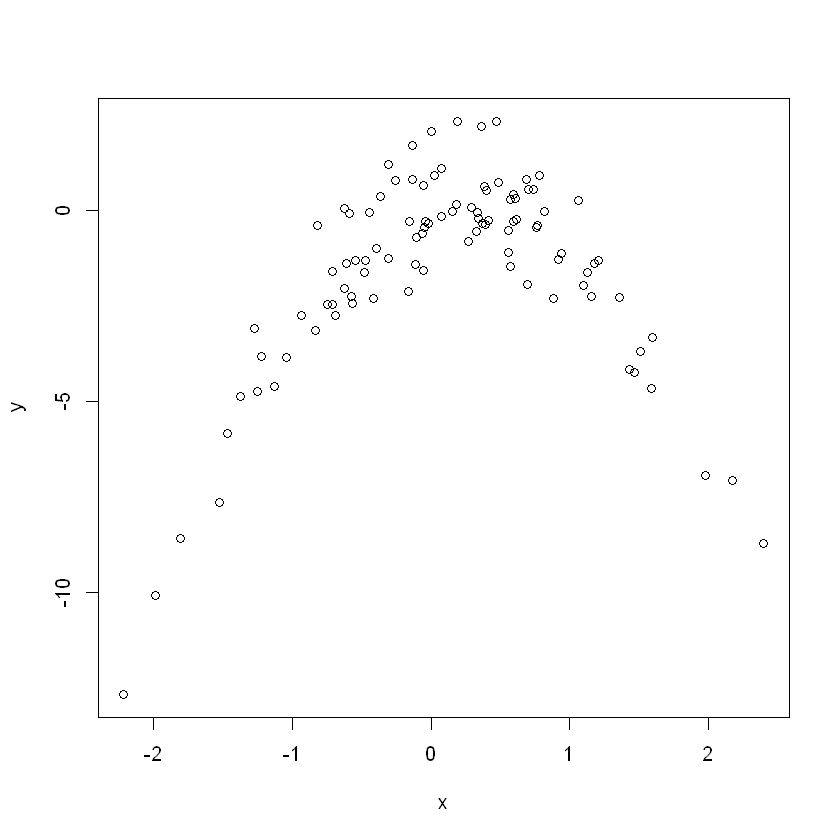

In [23]:
plot(x,y)
# y is a parabola function of x

In [24]:
# c

In [33]:
library(boot)

In [26]:
df = data.frame(x,y)

In [47]:
cv.error = rep(0,4)

In [48]:
glm.fit = glm(y~poly(x,1),data=df)

In [49]:
cv.error[1]=cv.glm(df,glm.fit)$delta[1]

In [50]:
cv.error

[1] 7.288162 0.000000 0.000000 0.000000

In [51]:
glm.fit = glm(y~poly(x,2),data=df)

In [52]:
cv.error[2]=cv.glm(df,glm.fit)$delta[1]

In [53]:
cv.error

[1] 7.2881616 0.9374236 0.0000000 0.0000000

In [54]:
glm.fit = glm(y~poly(x,3),data=df)
cv.error[3]=cv.glm(df,glm.fit)$delta[1]
cv.error

[1] 7.2881616 0.9374236 0.9566218 0.0000000

In [55]:
glm.fit = glm(y~poly(x,4),data=df)
cv.error[4]=cv.glm(df,glm.fit)$delta[1]
cv.error

[1] 7.2881616 0.9374236 0.9566218 0.9539049

In [56]:
# d

In [57]:
set.seed(2)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

In [58]:
df = data.frame(x,y)

In [59]:
cv.error = rep(0,4)

In [60]:
glm.fit = glm(y~poly(x,1),data=df)
cv.error[1]=cv.glm(df,glm.fit)$delta[1]
glm.fit = glm(y~poly(x,2),data=df)
cv.error[2]=cv.glm(df,glm.fit)$delta[1]
glm.fit = glm(y~poly(x,3),data=df)
cv.error[3]=cv.glm(df,glm.fit)$delta[1]
glm.fit = glm(y~poly(x,4),data=df)
cv.error[4]=cv.glm(df,glm.fit)$delta[1]

cv.error

[1] 9.858301 1.004410 1.018030 1.035601

In [61]:
# e
# ii had the smallest LOOCV error
# It is expected, as the original function is to the second degree, this is why the smallest error is found using this model

In [62]:
# f
# There is a sharp drop in the estimated test MSE between the linear and quadratic fits
# The improvement from using higher-order polynomials is very small and possibly statistically insignificant

In [66]:
# Chapter 6
# 1
# a

In [ ]:
# When performing best subset selection, the model with k predictors is the model with the smallest RSS among all the Ckp models with k predictors. When performing forward stepwise selection, the model with k predictors is the model with the smallest RSS among the p−k models which augment the predictors in Mk−1 with one additional predictor. When performing backward stepwise selection, the model with k predictors is the model with the smallest RSS among the k models which contains all but one of the predictors in Mk+1. 
# Therefore, the model with k predictors which has the smallest training RSS is the one obtained from best subset selection as it is the one selected among all k predictors models.


In [67]:
# b

In [ ]:
# It depends on the specific situation and dataset, we do not know which model may provide the smallest test RSS

In [64]:
# c

In [65]:
# i. True
# ii. True
# iii. False; There is no direct link between the models obtained from forward and backward selection.
# iv. False
# v. False; The model with (k+1) predictors is obtained by selecting among all possible models with (k+1) predictors, and so does not necessarily contain all the predictors selected for the k-variable model.

In [69]:
# 9
# a

In [126]:
library(ISLR)
data(College)
set.seed(1)
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train
College.train <- College[train, ]
College.test <- College[test, ]

In [71]:
# b

In [72]:
fit.lm <- lm(Apps ~ ., data = College.train)
pred.lm <- predict(fit.lm, College.test)
mean((pred.lm - College.test$Apps)^2)

[1] 1026096

In [73]:
# c

In [75]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [76]:
train.mat <- model.matrix(Apps ~ ., data = College.train)
test.mat <- model.matrix(Apps ~ ., data = College.test)
grid <- 10 ^ seq(4, -2, length = 100)
fit.ridge <- glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge <- cv.glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 0.01

In [77]:
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
mean((pred.ridge - College.test$Apps)^2)

[1] 1026069

In [78]:
# d

In [79]:
fit.lasso <- glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

In [80]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - College.test$Apps)^2)

[1] 1026036

In [81]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)   37.86520037
(Intercept)    .         
PrivateYes  -551.14946609
Accept         1.74980812
Enroll        -1.36005786
Top10perc     65.55655577
Top25perc    -22.52640339
F.Undergrad    0.10181853
P.Undergrad    0.01789131
Outstate      -0.08706371
Room.Board     0.15384585
Books         -0.12227313
Personal       0.16194591
PhD          -14.29638634
Terminal      -1.03118224
S.F.Ratio      4.47956819
perc.alumni   -0.45456280
Expend         0.05618050
Grad.Rate      9.07242834

In [82]:
# e

In [83]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



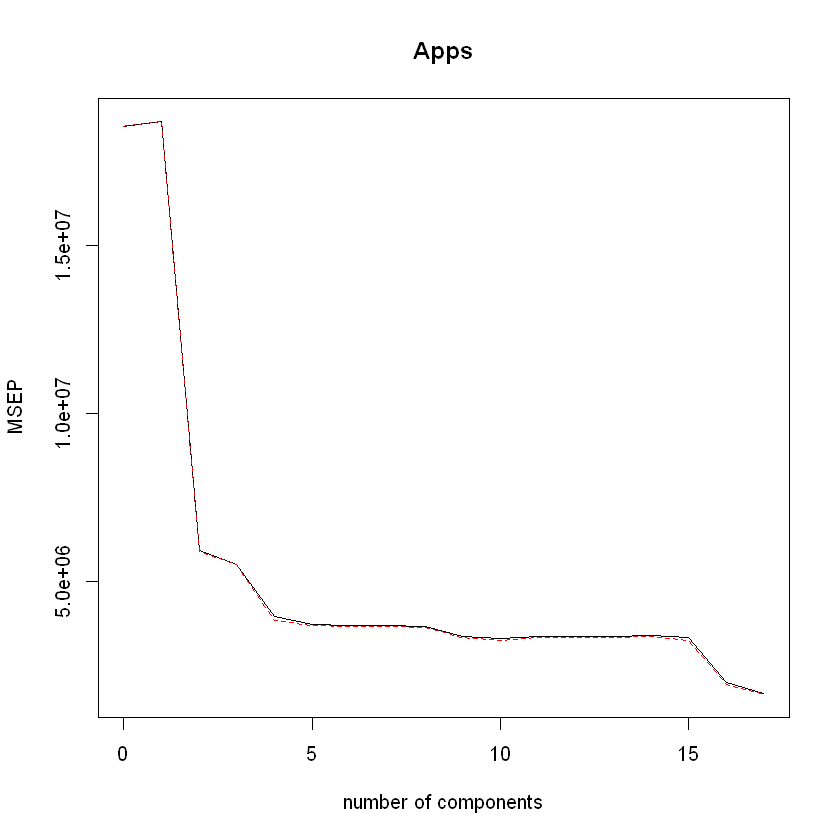

In [84]:
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fit.pcr, val.type = "MSEP")

In [85]:
pred.pcr <- predict(fit.pcr, College.test, ncomp = 10)
mean((pred.pcr - College.test$Apps)^2)

[1] 1867486

In [86]:
# f

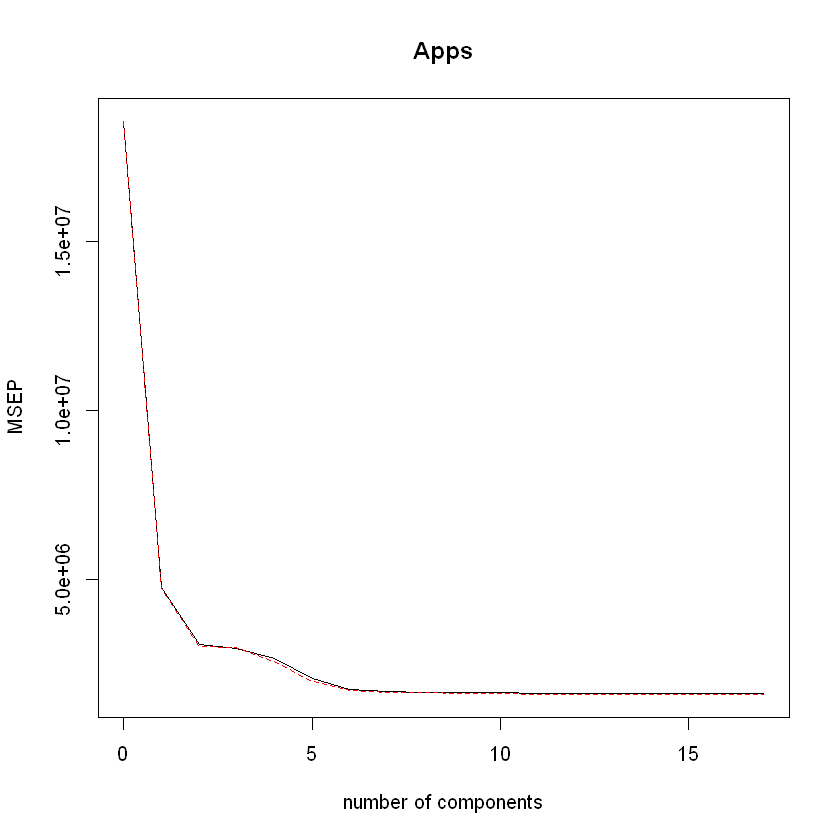

In [87]:
fit.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fit.pls, val.type = "MSEP")

In [88]:
pred.pls <- predict(fit.pls, College.test, ncomp = 10)
mean((pred.pls - College.test$Apps)^2)

[1] 1031287

In [89]:
# g

In [90]:
test.avg <- mean(College.test$Apps)
lm.r2 <- 1 - mean((pred.lm - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
ridge.r2 <- 1 - mean((pred.ridge - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
lasso.r2 <- 1 - mean((pred.lasso - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pcr.r2 <- 1 - mean((pred.pcr - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)
pls.r2 <- 1 - mean((pred.pls - College.test$Apps)^2) / mean((test.avg - College.test$Apps)^2)

In [91]:
# chapter 7
# 9
# a

In [128]:
library(MASS)

In [129]:
set.seed(1)
fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


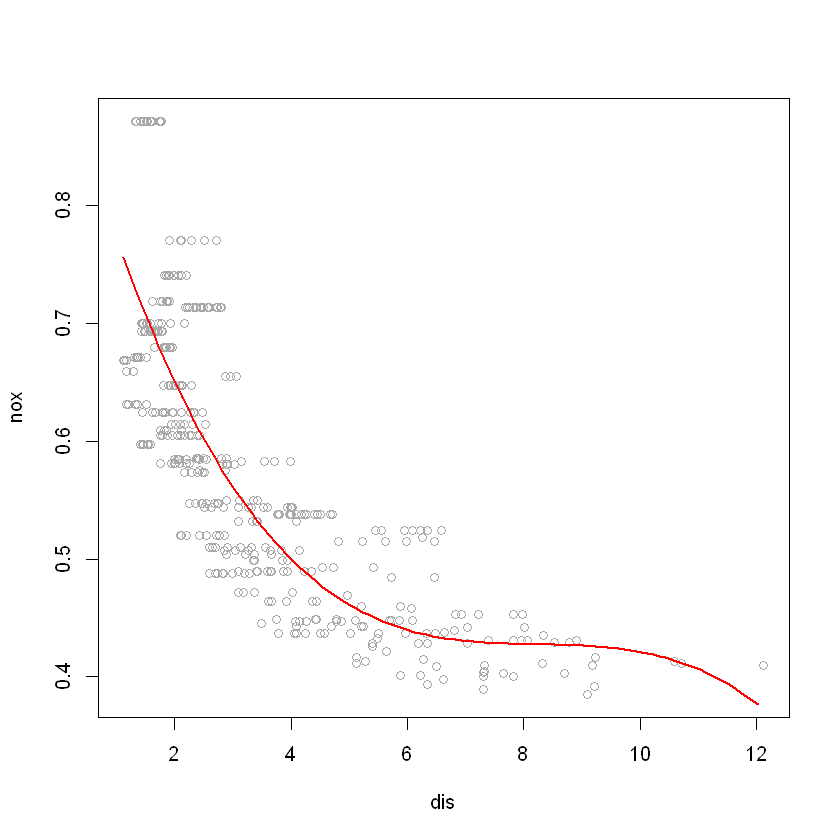

In [130]:
disrange <- range(Boston$dis)
dis.grid <- seq(from = disrange[1], to = disrange[2], by = 0.1)
preds <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "red", lwd = 2)

In [94]:
# b

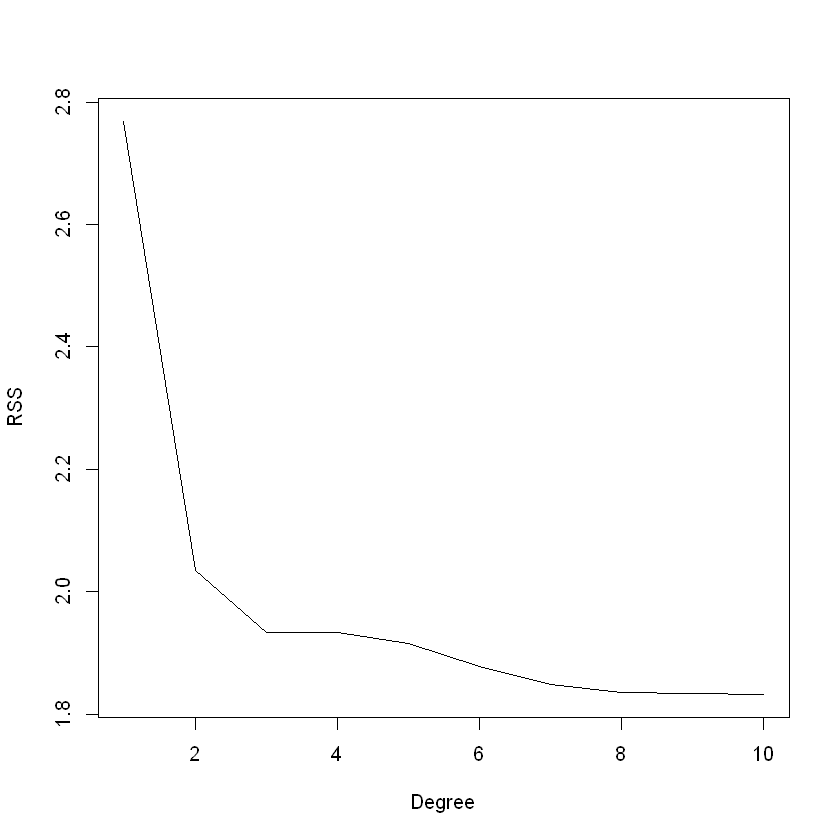

In [95]:
rss <- rep(NA, 10)
for (i in 1:10) {
    fit <- lm(nox ~ poly(dis, i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(1:10, rss, xlab = "Degree", ylab = "RSS", type = "l")

In [96]:
# c

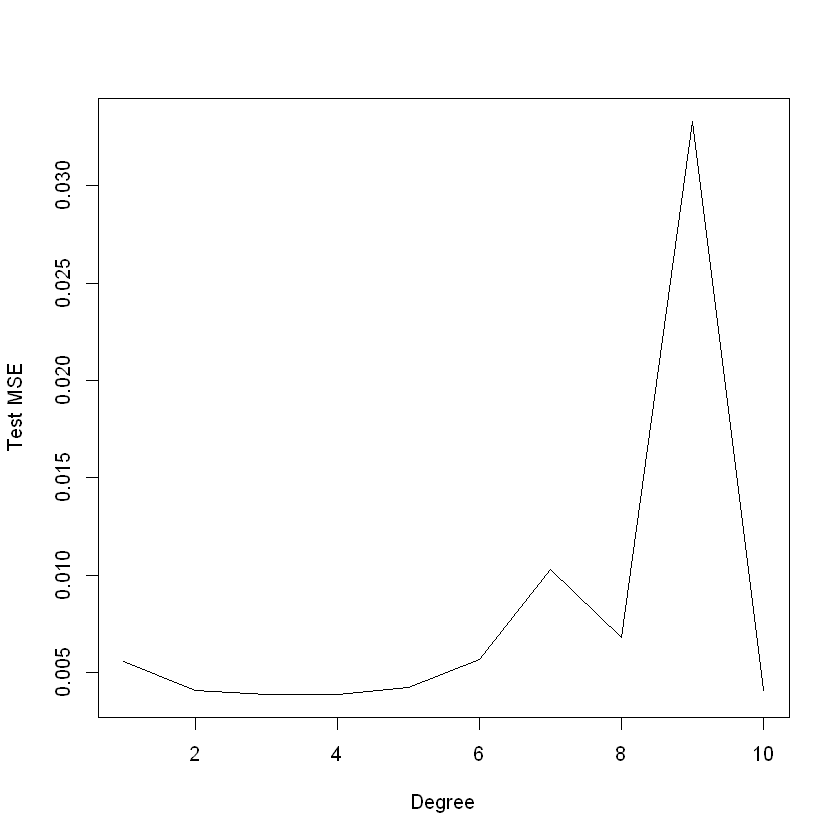

In [97]:
deltas <- rep(NA, 10)
for (i in 1:10) {
    fit <- glm(nox ~ poly(dis, i), data = Boston)
    deltas[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}
plot(1:10, deltas, xlab = "Degree", ylab = "Test MSE", type = "l")

In [100]:
# d

In [101]:
library(splines)

In [102]:
fit <- lm(nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adjusted R-squared:  0.7151 
F-statistic: 212.3 on 6 and 499 DF,  p-value: <

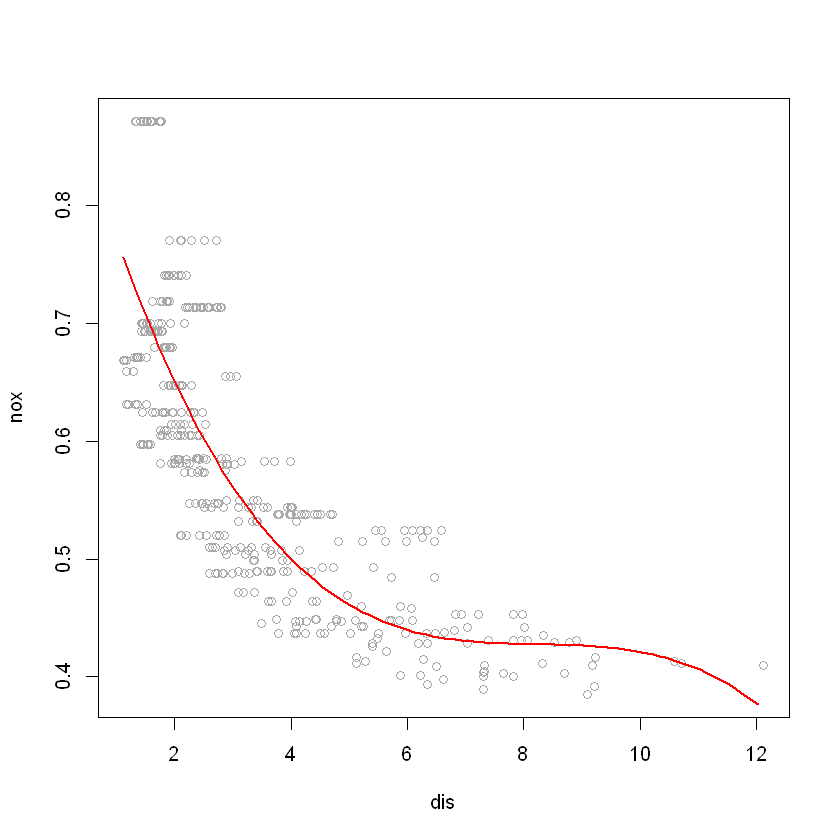

In [103]:
pred <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "red", lwd = 2)

In [104]:
# e

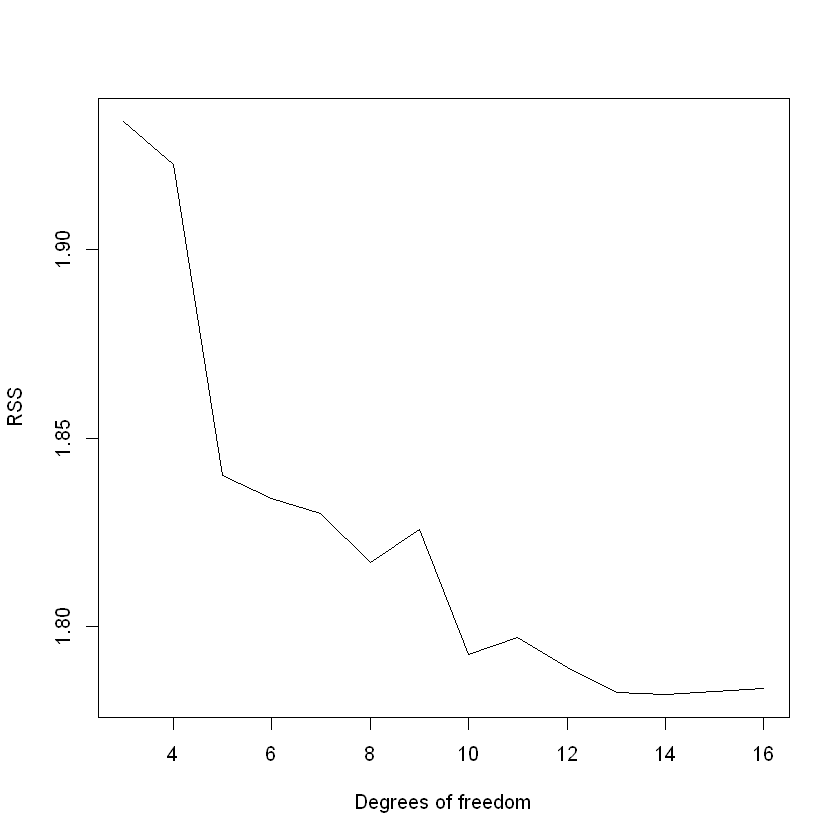

In [105]:
rss <- rep(NA, 16)
for (i in 3:16) {
    fit <- lm(nox ~ bs(dis, df = i), data = Boston)
    rss[i] <- sum(fit$residuals^2)
}
plot(3:16, rss[-c(1, 2)], xlab = "Degrees of freedom", ylab = "RSS", type = "l")

In [106]:
# f

In [107]:
cv <- rep(NA, 16)
for (i in 3:16) {
    fit <- glm(nox ~ bs(dis, df = i), data = Boston)
    cv[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.0992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.0992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, deg

"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`7.142857%` = 1.5768, `14.28571%` = 1.81652857142857, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`7.142857%` = 1.5768, `14.28571%` = 1.81652857142857, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"

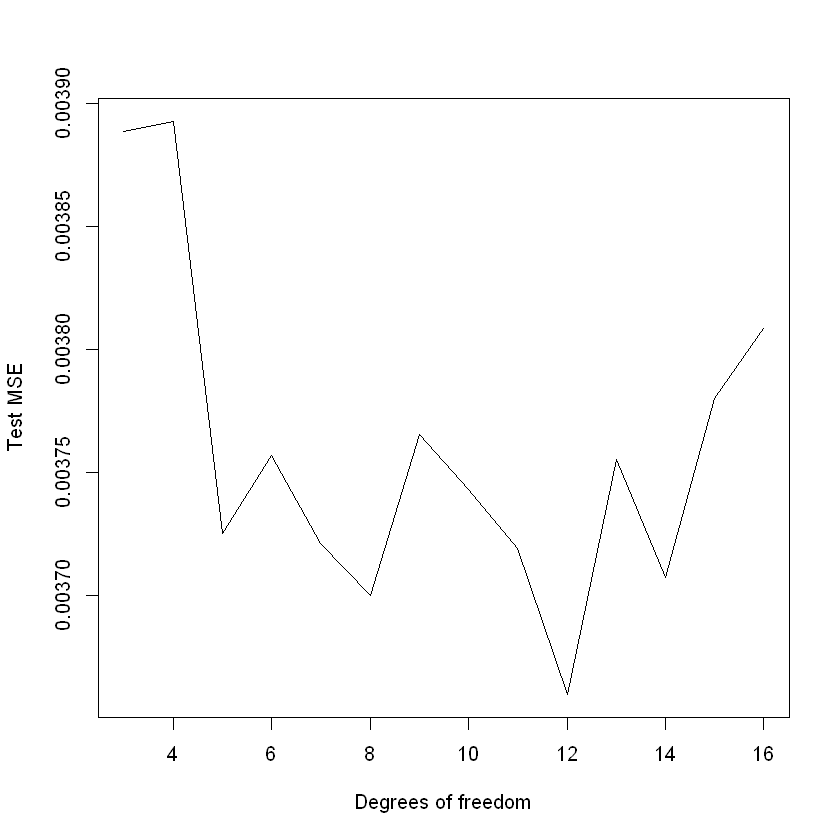

In [108]:
plot(3:16, cv[-c(1, 2)], xlab = "Degrees of freedom", ylab = "Test MSE", type = "l")

In [109]:
# 10
# a

In [111]:
install.packages("leaps")

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ffan1\AppData\Local\Temp\RtmpIhiHz9\downloaded_packages


In [131]:
library(leaps)
set.seed(1)

In [132]:
attach(College)

The following objects are masked from College (pos = 4):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc



In [134]:
train <- sample(length(Outstate), length(Outstate) / 2)
test <- -train
College.train <- College[train, ]
College.test <- College[test, ]

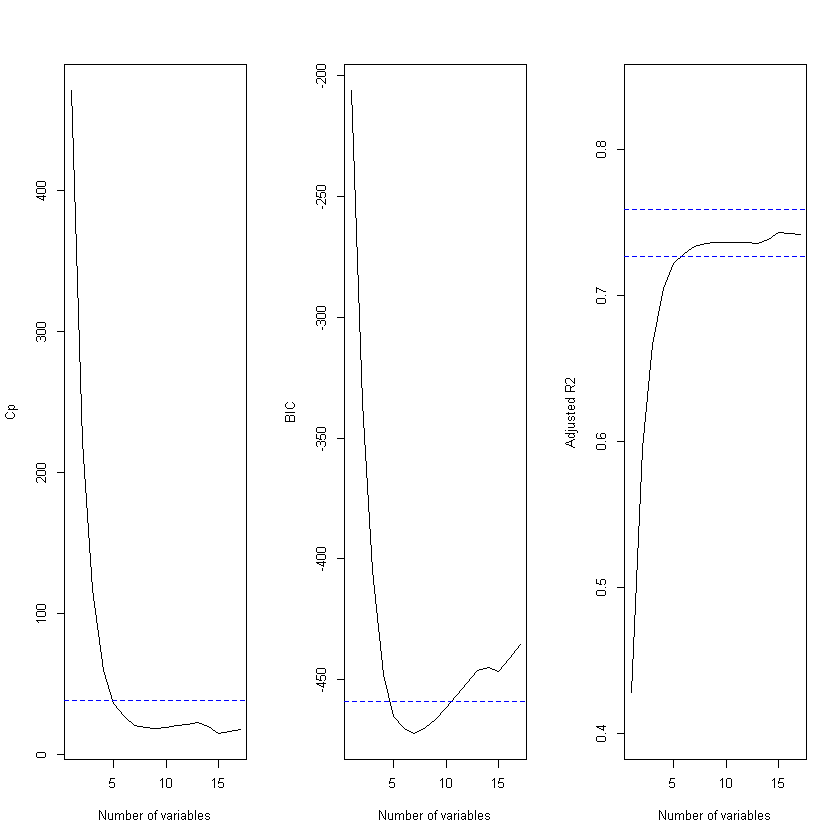

In [136]:
fit <- regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
fit.summary <- summary(fit)
par(mfrow = c(1, 3))
plot(fit.summary$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary$cp)
std.cp <- sd(fit.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "blue", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "blue", lty = 2)
plot(fit.summary$bic, xlab = "Number of variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary$bic)
std.bic <- sd(fit.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "blue", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "blue", lty = 2)
plot(fit.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type = "l", ylim = c(0.4, 0.84))
max.adjr2 <- max(fit.summary$adjr2)
std.adjr2 <- sd(fit.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "blue", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "blue", lty = 2)

In [137]:
fit <- regsubsets(Outstate ~ ., data = College, method = "forward")
coeff <- coef(fit, id = 6)
names(coeff)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

In [114]:
# b

In [118]:
install.packages("gam")


  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

  Binaries will be installed
package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ffan1\AppData\Local\Temp\RtmpIhiHz9\downloaded_packages


In [119]:
library(gam)

Warning message:
"package 'gam' was built under R version 3.6.3"Loaded gam 1.16.1



Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

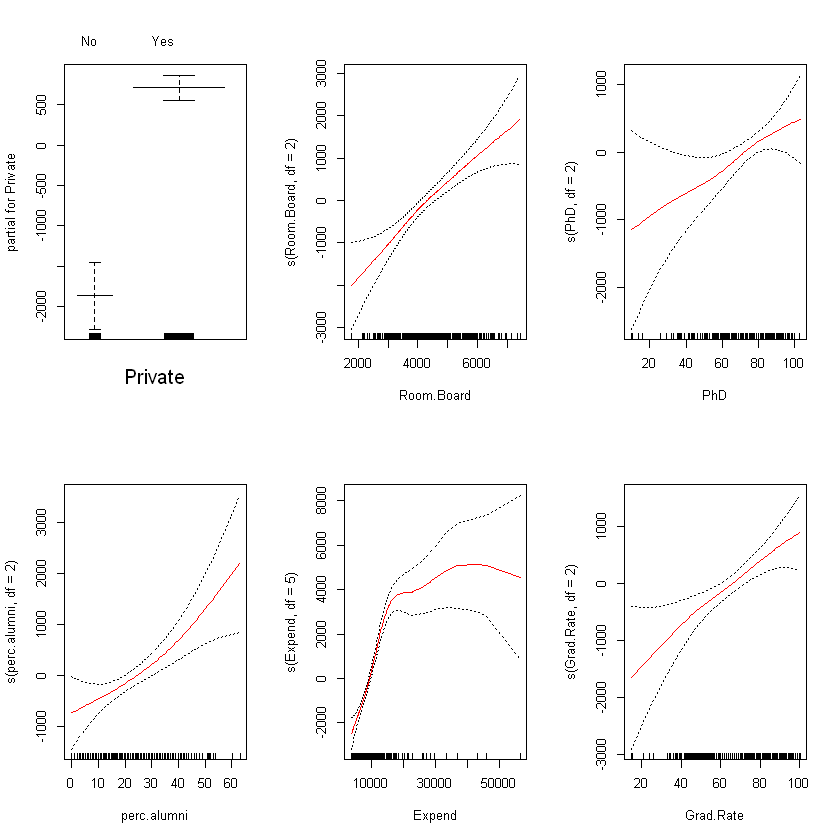

In [138]:
gamfit <- gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data=College.train)
par(mfrow = c(2, 3))
plot(gamfit, se = T, col = "red")

In [121]:
# c

In [140]:
preds <- predict(gamfit, College.test)
error <- mean((College.test$Outstate - preds)^2)
error

[1] 3362164

In [141]:
tss <- mean((College.test$Outstate - mean(College.test$Outstate))^2)
rss <- 1 - err / tss
rss

[1] 0.791474

In [124]:
# d

In [142]:
summary(fit)

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College, method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       " "       " "        
3  (